In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/train.csv')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8522 entries, 0 to 8521
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8522 non-null   object 
 1   Item_Weight                7059 non-null   float64
 2   Item_Fat_Content           8522 non-null   object 
 3   Item_Visibility            8522 non-null   float64
 4   Item_Type                  8522 non-null   object 
 5   Item_MRP                   8522 non-null   float64
 6   Outlet_Identifier          8522 non-null   object 
 7   Outlet_Establishment_Year  8522 non-null   int64  
 8   Outlet_Size                6112 non-null   object 
 9   Outlet_Location_Type       8522 non-null   object 
 10  Outlet_Type                8522 non-null   object 
 11  Item_Outlet_Sales          8522 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [ ]:
df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7059.000000,8522.000000,8522.000000,8522.000000,8522.000000
mean,12.857370,0.066135,141.000471,1997.831964,2181.455027
std,4.643728,0.051600,62.274675,8.372247,1706.530835
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.772500,0.026988,93.844250,1987.000000,834.913200
50%,12.600000,0.053935,143.014100,1999.000000,1794.331000
75%,16.850000,0.094594,185.652250,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


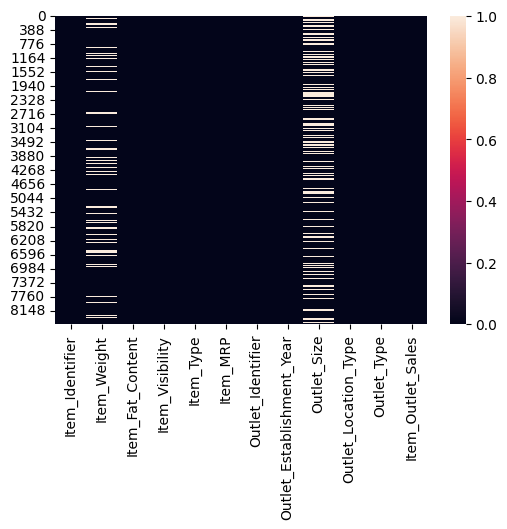

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df1.isna())
plt.show()

In [ ]:
features_with_na=[features for features in df1.columns if df1[features].isnull().sum()>1]
for feature in features_with_na:
  print(feature, np.round(df1[feature].isnull().mean(),2),'% missing values')

Item_Weight 0.17 % missing values
Outlet_Size 0.28 % missing values


Text(0.5, 1.0, 'Item Wieght Distribution')

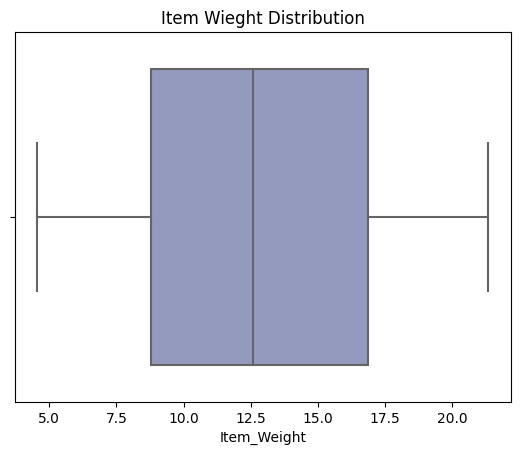

In [ ]:
sns.boxplot(x=df1['Item_Weight'], palette='BuPu')
plt.title('Item Wieght Distribution')

**As there is no outliers, we can use mean value to replace those null values**

In [ ]:
df1["Item_Weight"].fillna(df1["Item_Weight"].mean(), inplace=True)
df1["Outlet_Size"].fillna(df1["Outlet_Size"].mode()[0], inplace=True)

In [ ]:
df1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
zero_values = df1['Item_Visibility'] == 0
print(zero_values.any())

True


Text(0.5, 1.0, 'Item Visibility Distribution')

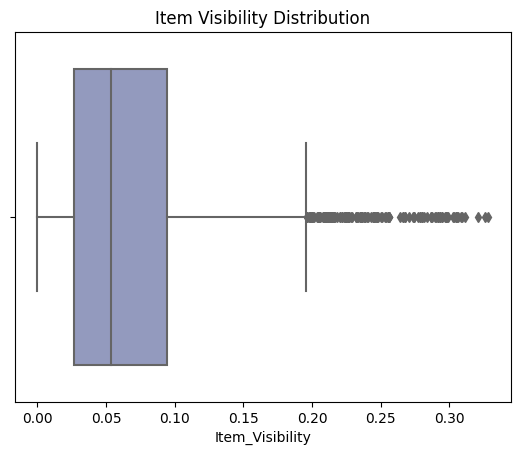

In [ ]:
sns.boxplot(x=df1['Item_Visibility'], palette='BuPu')
plt.title('Item Visibility Distribution')

In [ ]:
df1['Item_Visibility'] = np.sqrt(df1['Item_Visibility'])

<ipython-input-319-6af7ff72f096>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Item_Visibility'])


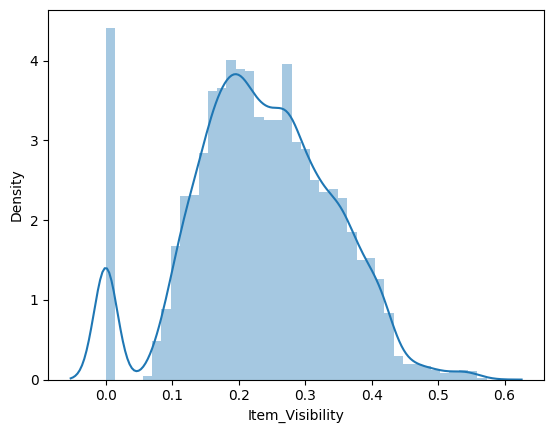

In [ ]:
sns.distplot(df1['Item_Visibility'])
plt.show()

Text(0.5, 1.0, 'Item Visibility Distribution')

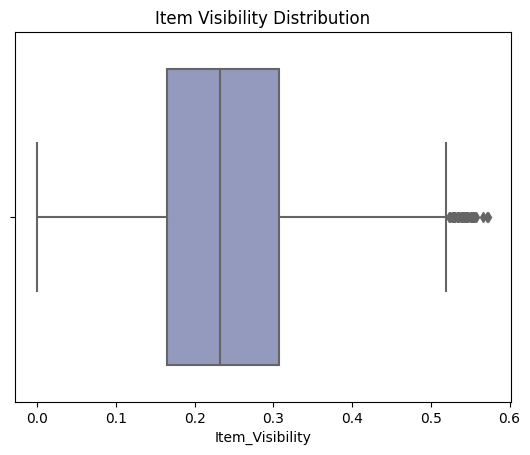

In [ ]:
sns.boxplot(x=df1['Item_Visibility'], palette='BuPu')
plt.title('Item Visibility Distribution')

In [ ]:
df1.loc[:, 'Item_Visibility'].replace([0],[df1['Item_Visibility'].mean()],inplace=True)

In [ ]:
df1.drop(['Item_Identifier'],axis=1,inplace=True)
df1.drop(['Outlet_Identifier'],axis=1,inplace=True)
#unnecessary feature

In [ ]:
cat_col=[]
for x in df1.dtypes.index:
  if df1.dtypes[x]=='object':
    cat_col.append(x)
for col in cat_col:
  print(col)
  print(df1[col].value_counts())
  print()

Item_Fat_Content
Low Fat    5088
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               444
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    5203
Small     2387
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2387
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5576
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [ ]:
df1['Item_Fat_Content']=df1['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
df1['Item_Fat_Content'].value_counts()

Low Fat    5516
Regular    3006
Name: Item_Fat_Content, dtype: int64

<ipython-input-325-ba1e524b4919>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),cmap='GnBu', annot=True)


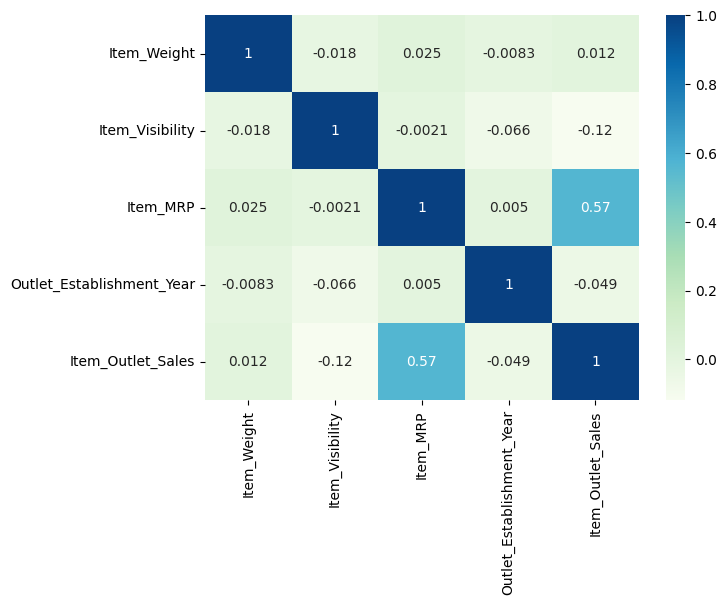

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df1.corr(),cmap='GnBu', annot=True)
plt.show()

**Visualization On Categorical Features**

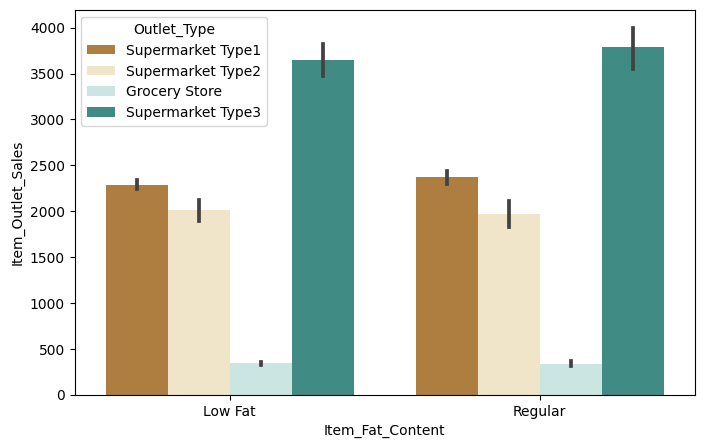

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales',data=df1,hue='Outlet_Type',palette='BrBG')
plt.show()

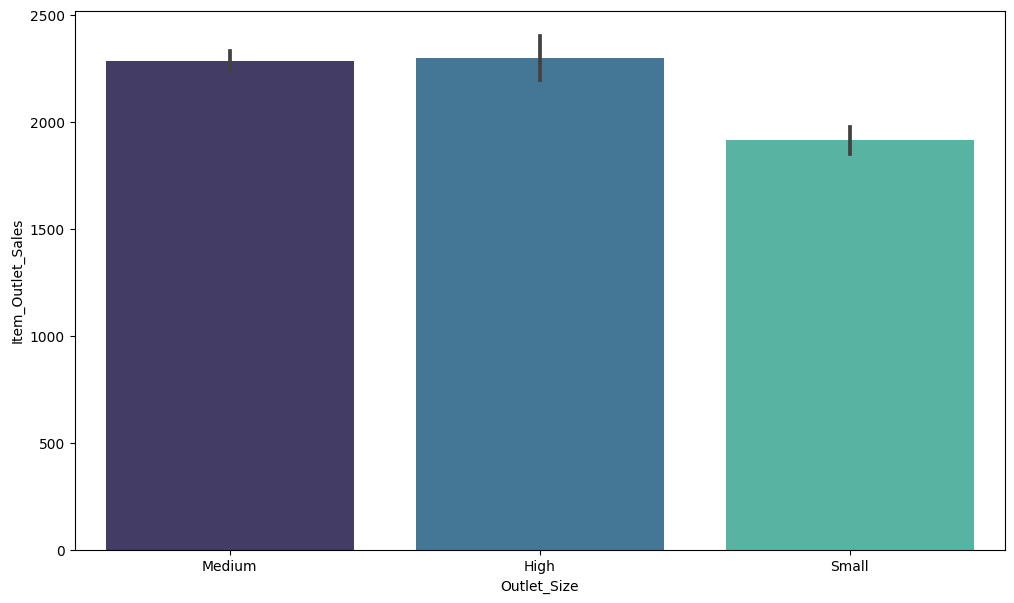

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df1, palette='mako')
plt.show()

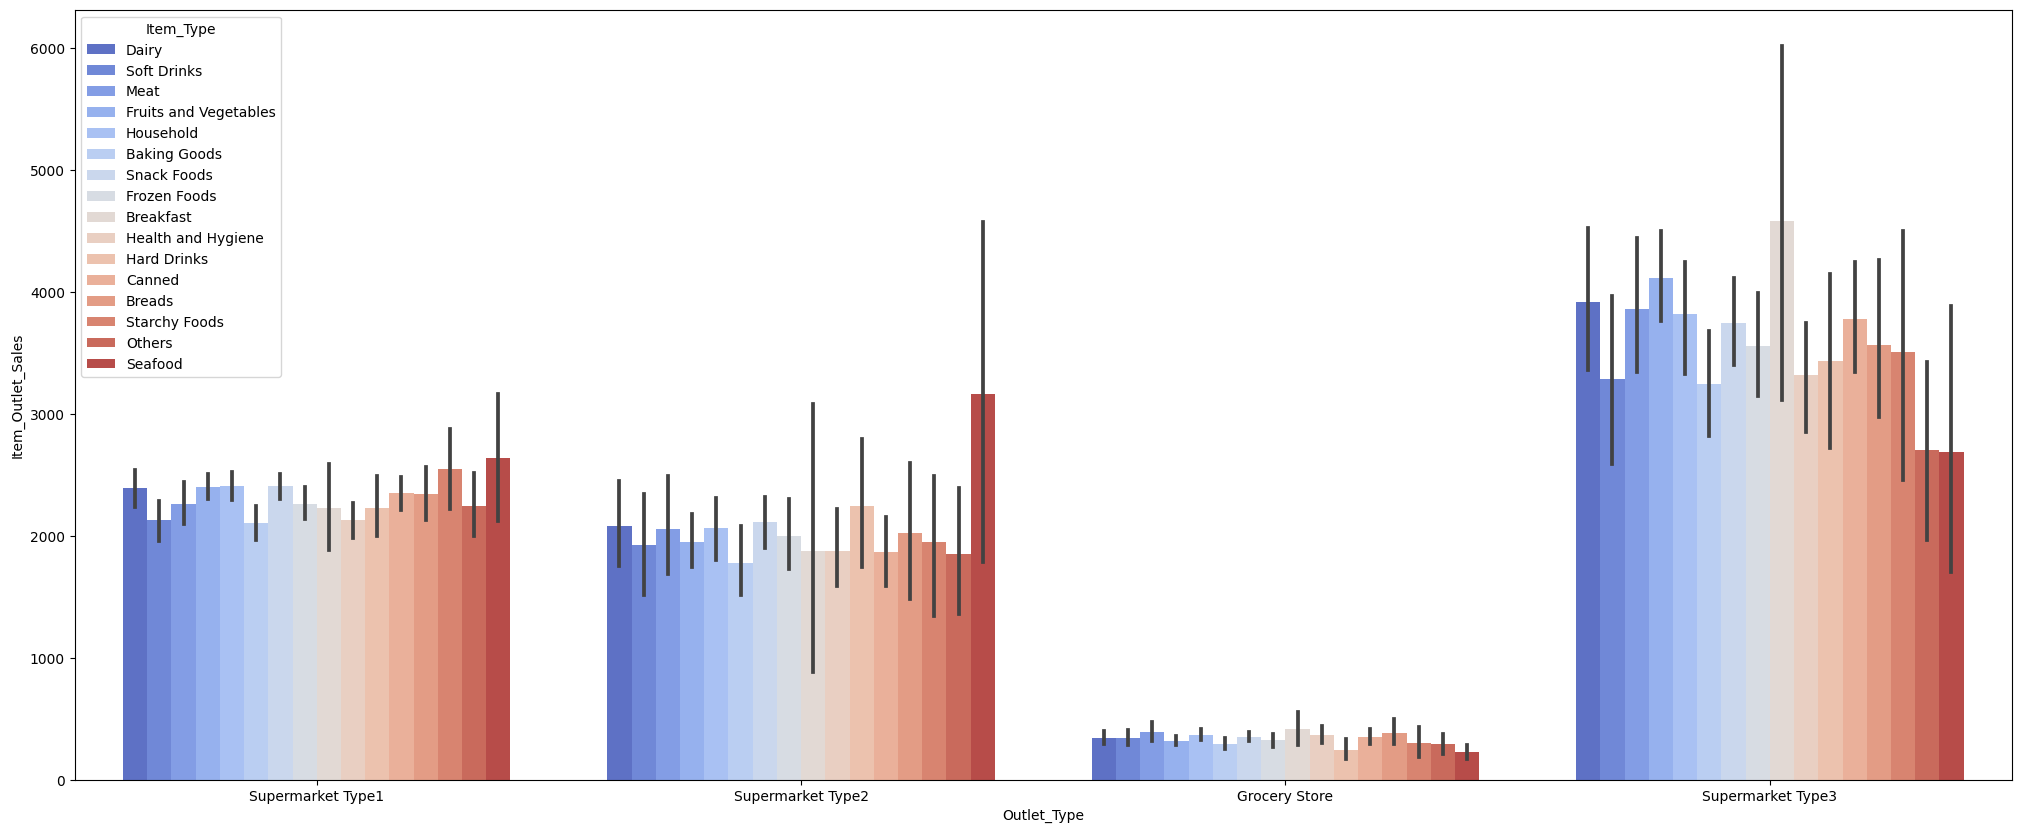

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Item_Type',data=df1, palette='coolwarm')
plt.show()

**Visualization on Numerical features**

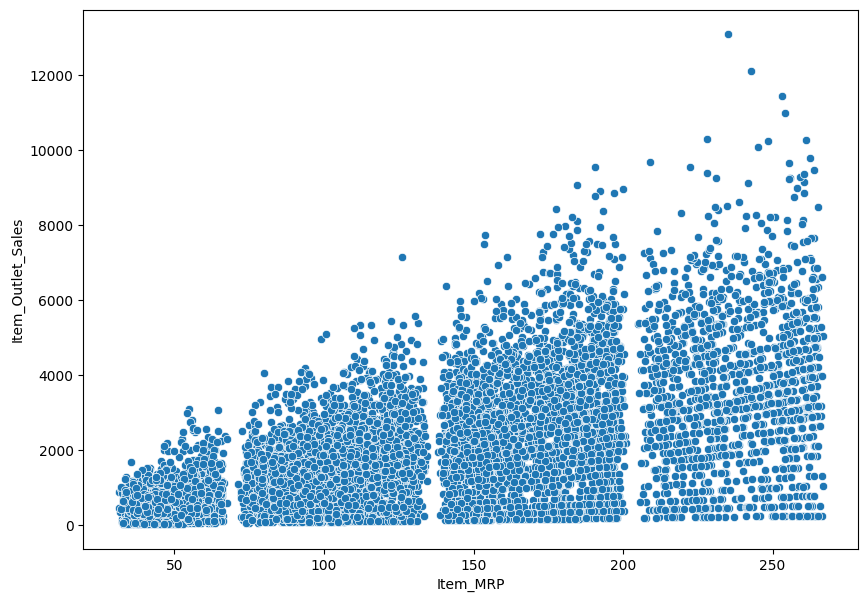

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=df1)
plt.show()

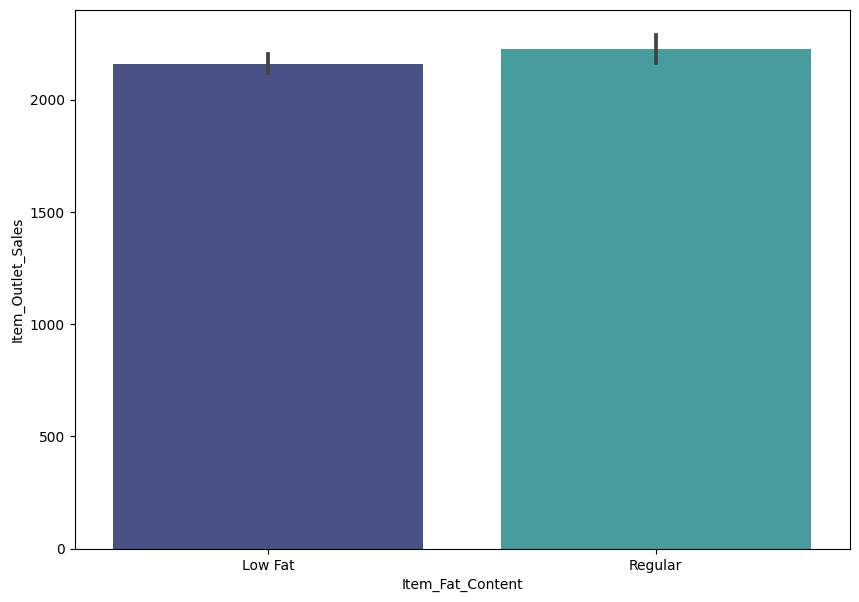

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df1, palette='mako')
plt.show()

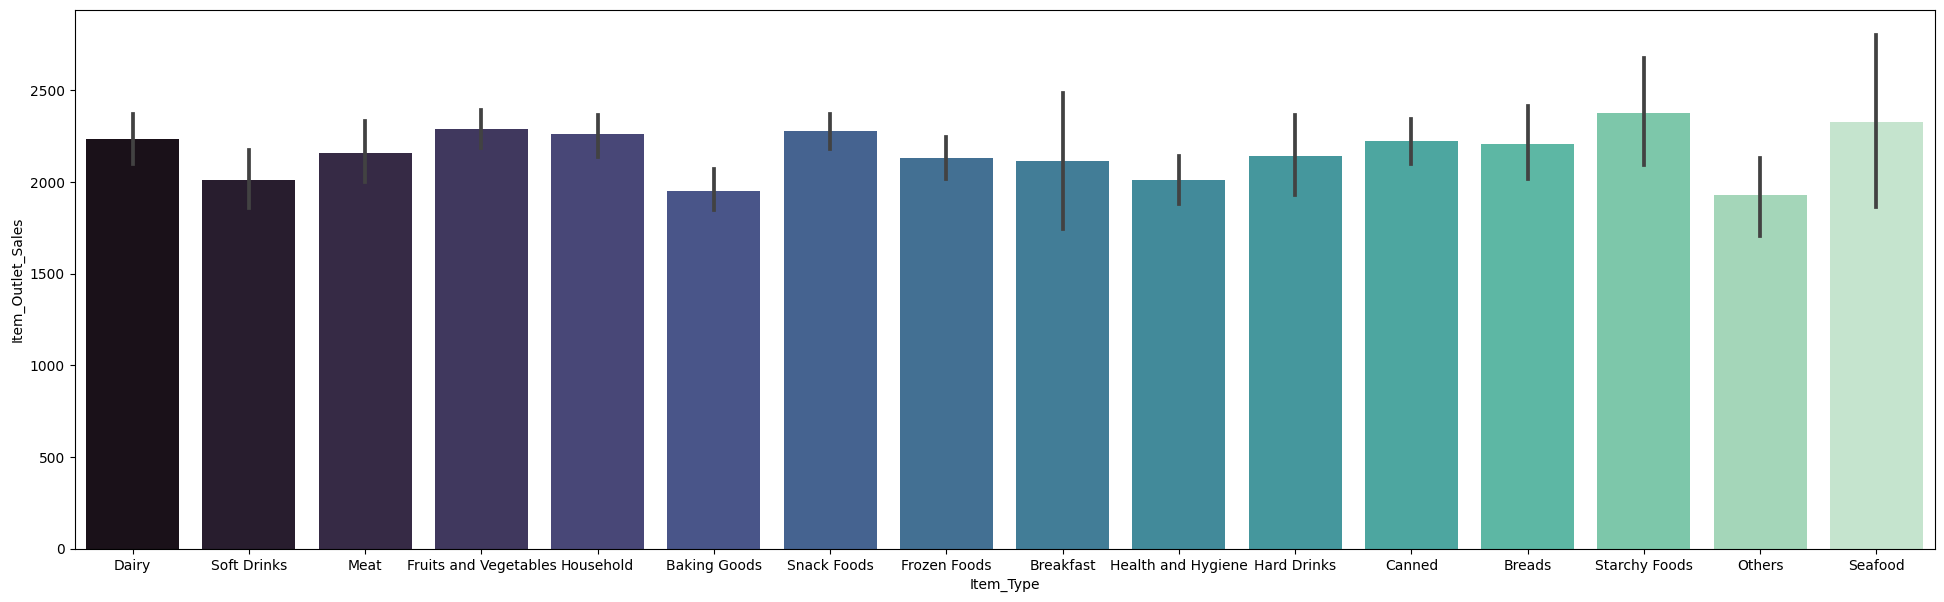

In [ ]:
plt.figure(figsize=(24,7))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=df1, palette='mako')
plt.show()

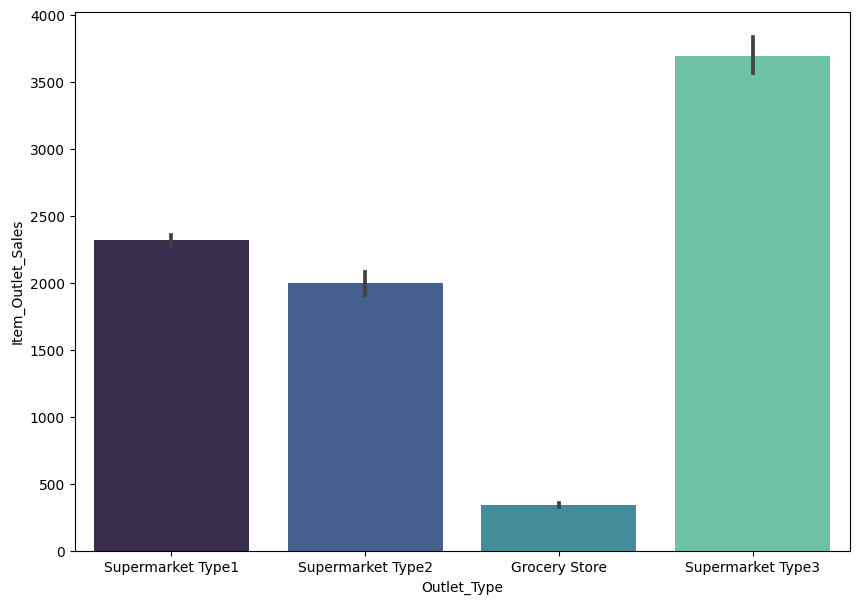

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df1, palette='mako')
plt.show()

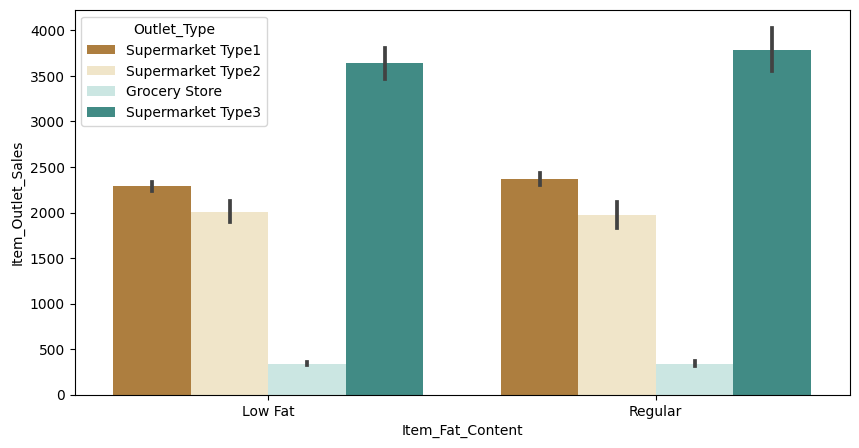

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales',data=df1,hue='Outlet_Type',palette='BrBG')
plt.show()

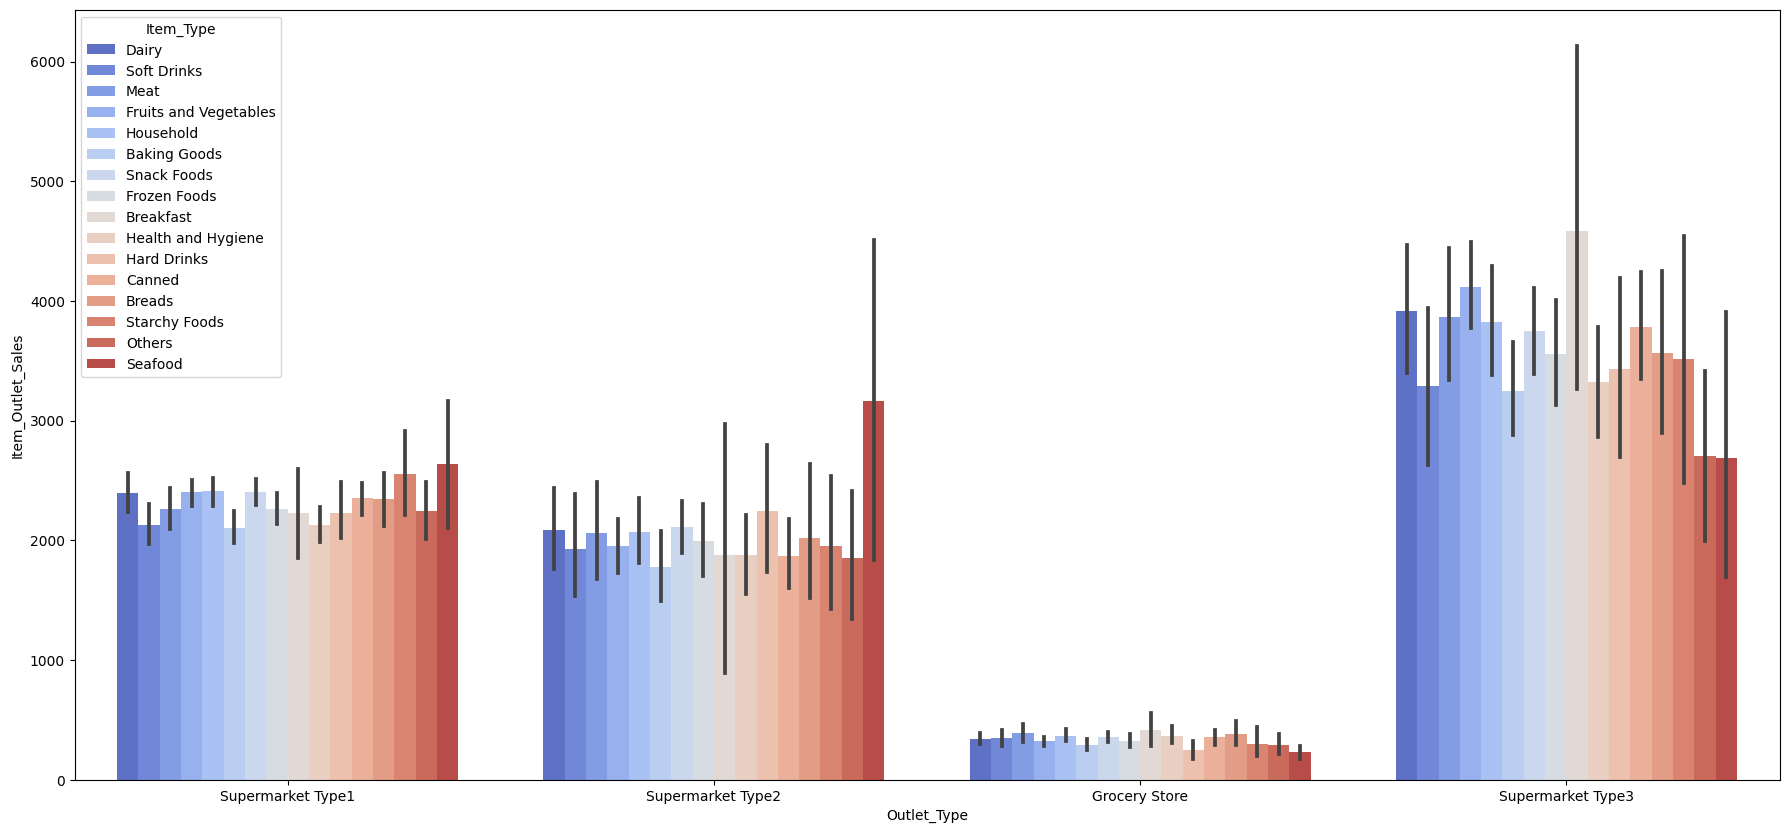

In [ ]:
plt.figure(figsize=(22,10))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Item_Type',data=df1, palette='coolwarm')
plt.show()

<ipython-input-335-f064cb252091>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Item_Outlet_Sales'])


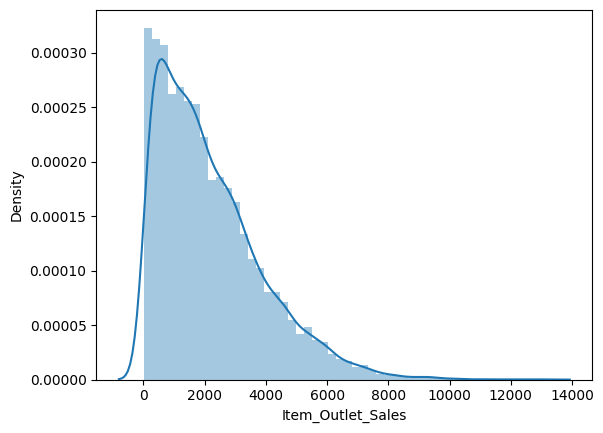

In [ ]:
sns.distplot(df1['Item_Outlet_Sales'])
plt.show()

<ipython-input-336-f547f204465b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Item_Outlet_Sales'])


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

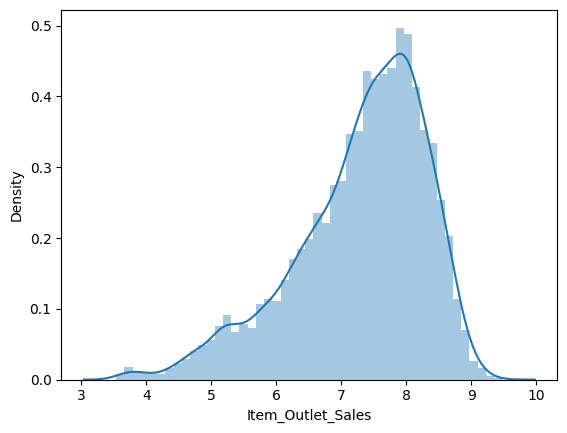

In [ ]:
df1['Item_Outlet_Sales']=np.log(1+df1['Item_Outlet_Sales'])
sns.distplot(df1['Item_Outlet_Sales'])

**Encoding**

In [ ]:

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df1['Item_Type'] = label_encoder.fit_transform(df1['Item_Type'])

df1=pd.get_dummies(df1,columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type'])


In [ ]:
from sklearn.model_selection import train_test_split
X = df1.drop(columns=["Item_Outlet_Sales"])
Y = df1.Item_Outlet_Sales
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=23)

**Model Building**

In [ ]:
from sklearn.linear_model import LinearRegression
lc=LinearRegression()
lc.fit(X_train,Y_train)

LinearRegression()

In [ ]:
pred1=lc.predict(X_test)
pred1


array([7.04893996, 8.1550398 , 7.80862383, ..., 6.76567086, 7.53126653,
       6.7419867 ])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Rclf=RandomForestRegressor(n_estimators=50, random_state=42)
Rclf.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [ ]:
pred2=Rclf.predict(X_test)
pred2

array([7.43165628, 7.96314534, 7.86135796, ..., 6.82940966, 7.7941516 ,
       6.8096501 ])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dc=DecisionTreeRegressor(random_state=42)
dc.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
pred3=dc.predict(X_test)
pred3

array([7.68010635, 7.94849683, 8.34573679, ..., 7.27086694, 7.64441625,
       7.07619831])

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada= AdaBoostRegressor(n_estimators=50, random_state=42)
ada.fit(X_train, Y_train)

AdaBoostRegressor(random_state=42)

In [ ]:
pred4=ada.predict(X_test)
pred4

array([6.91121785, 7.7893792 , 7.72851498, ..., 6.39210629, 7.39081812,
       6.34153529])

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gd = GradientBoostingRegressor(n_estimators=50, random_state=42)
gd.fit(X_train, Y_train)


GradientBoostingRegressor(n_estimators=50, random_state=42)

In [ ]:
pred5=gd.predict(X_test)
pred5

array([7.11668461, 8.02261322, 7.92771202, ..., 6.68894336, 7.64960247,
       6.54765999])

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("Result on Linear Regression:\n")
print("R2_Score:\t\t",r2_score(Y_test,pred1))
print("Mean_absolute_error:\t",mean_absolute_error(Y_test,pred1))
print("Mean_squared_error\t",mean_squared_error(Y_test,pred1))
print("\n\nResult on Random Forest Regressor:\n")
print("R2_Score:\t\t",r2_score(Y_test,pred2))
print("Mean_absolute_error:\t",mean_absolute_error(Y_test,pred2))
print("Mean_squared_error\t",mean_squared_error(Y_test,pred2))
print("\n")
print("Result on Decision Tree Regressor:\n")
print("R2_Score:\t\t",r2_score(Y_test,pred3))
print("Mean_absolute_error:\t",mean_absolute_error(Y_test,pred3))
print("Mean_squared_error\t",mean_squared_error(Y_test,pred3))
print("\n\nResult on Ada Boost Regressor:\n")
print("R2_Score:\t\t",r2_score(Y_test,pred4))
print("Mean_absolute_error:\t",mean_absolute_error(Y_test,pred4))
print("Mean_squared_error\t",mean_squared_error(Y_test,pred4))
print("\n")
print("Result on Gradient Boosting Regressor:\n")
print("R2_Score:\t\t",r2_score(Y_test,pred5))
print("Mean_absolute_error:\t",mean_absolute_error(Y_test,pred5))
print("Mean_squared_error\t",mean_squared_error(Y_test,pred5))




Result on Linear Regression:

R2_Score:		 0.735860560871672
Mean_absolute_error:	 0.40764484917830807
Mean_squared_error	 0.2723355291258172


Result on Random Forest Regressor:

R2_Score:		 0.7121727867943521
Mean_absolute_error:	 0.42827874535108756
Mean_squared_error	 0.2967583207712012


Result on Decision Tree Regressor:

R2_Score:		 0.4686806832268746
Mean_absolute_error:	 0.5711505797434742
Mean_squared_error	 0.5478058397704023


Result on Ada Boost Regressor:

R2_Score:		 0.6691688192054576
Mean_absolute_error:	 0.4824975029457316
Mean_squared_error	 0.34109667594632986


Result on Gradient Boosting Regressor:

R2_Score:		 0.7484163826187091
Mean_absolute_error:	 0.3972579617295253
Mean_squared_error	 0.2593901076833664
